In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
train=pd.read_csv('Train.csv')

In [4]:
train.head()

,cust_id,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NEVER_BOUNCE_FLAG,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,TOTAL_OUTSTANDING_BALANCE LIVE_TRACTOR LOAN,number of unique receipt cut,BOUNCE_FLAG
0,cust_1,NaN,300000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NO,NaN,NaN,NaN,NaN,0,0,7.0,0,17.0,18.99,0,NaN,0,1
1,cust_2,0.0,402000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,NO,0.0,1.0,1.0,0.0,1,0,5.0,28,16.0,24.00,1,NaN,1,0
2,cust_3,0.0,300000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,NO,0.0,1.0,1.0,0.0,0,14,5.0,14,22.0,22.00,1,NaN,1,0
3,cust_4,0.0,330000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,YES,0.0,0.0,0.0,0.0,2,5,18.0,5,24.0,22.95,1,NaN,1,1
4,cust_5,NaN,698000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NO,NaN,NaN,NaN,NaN,2,0,18.0,0,45.0,19.01,0,NaN,0,1


In [5]:
train=train.drop(['TOTAL_OUTSTANDING_BALANCE LIVE_TRACTOR LOAN'], axis=1)

In [6]:
train.isnull().sum()

cust_id                                                                                       0
AVARAGE _INTER_BOUNCE_TIME                                                                42983
salary of customer                                                                            0
FIRST 3 MONTH_BOUNCE_RATIO                                                                    0
FIRST_MONTH_BOUNCE                                                                        42983
LATEST 3 MONTH_BOUNCE_RATIO                                                                   0
LATEST 3 MONTH_CLEAR_RATIO                                                                    0
LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY                                                 42983
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D                                          42983
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D                                          42983
LATEST_MONTH_BOUNCE                     

<AxesSubplot:>

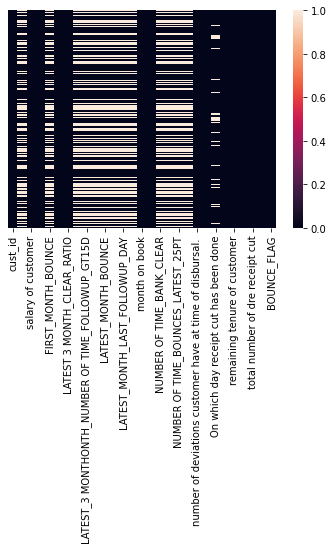

In [7]:
sns.heatmap(train.isnull(), yticklabels=False)

### Data Processing

In [8]:
nan=[features for features in train.columns if train[features].isnull().sum()>1]

In [9]:
for feature in nan:
    print(feature, np.round(train[feature].isnull().mean(), 4),  '' 'fraction missing values')

AVARAGE _INTER_BOUNCE_TIME 0.439 fraction missing values
FIRST_MONTH_BOUNCE 0.439 fraction missing values
LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY 0.439 fraction missing values
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D 0.439 fraction missing values
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D 0.439 fraction missing values
LATEST_MONTH_BOUNCE 0.439 fraction missing values
LATEST_MONTH_FIRST_FOLLOWUP_DAY 0.439 fraction missing values
LATEST_MONTH_LAST_FOLLOWUP_DAY 0.439 fraction missing values
LATEST_MONTH_UNIQ_INTENSITY 0.439 fraction missing values
NUMBER OF TIME_BANK_CLEAR 0.439 fraction missing values
NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH 0.439 fraction missing values
NUMBER OF TIME_BOUNCES_LATEST_25PT 0.439 fraction missing values
NUMBER OF TIME_CLEAR 0.439 fraction missing values
On which day receipt cut has been done 0.1225 fraction missing values
remaining tenure of customer 0.0019 fraction missing values


In [10]:
train

,cust_id,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NEVER_BOUNCE_FLAG,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,BOUNCE_FLAG
0,cust_1,NaN,300000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NO,NaN,NaN,NaN,NaN,0,0,7.0,0,17.0,18.99,0,0,1
1,cust_2,0.0,402000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,NO,0.0,1.0,1.0,0.0,1,0,5.0,28,16.0,24.00,1,1,0
2,cust_3,0.0,300000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,NO,0.0,1.0,1.0,0.0,0,14,5.0,14,22.0,22.00,1,1,0
3,cust_4,0.0,330000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,YES,0.0,0.0,0.0,0.0,2,5,18.0,5,24.0,22.95,1,1,1
4,cust_5,NaN,698000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NO,NaN,NaN,NaN,NaN,2,0,18.0,0,45.0,19.01,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97913,cust_97914,0.0,360000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,6.0,6.0,1.0,2,NO,0.0,1.0,1.0,0.0,1,6,5.0,6,44.0,19.00,1,1,1
97914,cust_97915,0.0,145000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,11.0,11.0,1.0,2,NO,0.0,1.0,1.0,0.0,0,11,5.0,11,10.0,0.00,1,1,0
97915,cust_97916,0.0,260000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,12.0,1.0,2,YES,0.0,0.0,0.0,0.0,1,12,8.0,12,58.0,18.00,1,1,1
97916,cust_97917,0.0,3111500,0.5,1.0,0.5,0.5,4.0,0.0,1.0,0.0,0.0,0.0,0.0,3,NO,1.0,1.0,0.0,1.0,1,30,31.0,30,24.0,17.89,1,1,1


In [11]:
cust_id = train[['cust_id']]
cust_id

,cust_id
0,cust_1
1,cust_2
2,cust_3
3,cust_4
4,cust_5
...,...
97913,cust_97914
97914,cust_97915
97915,cust_97916
97916,cust_97917


In [12]:
train=train.drop(['cust_id'], axis=1)

In [13]:
categorical_features=[feature for feature in train.columns if train[feature].dtypes=='O']
categorical_features

['NEVER_BOUNCE_FLAG']

In [14]:
train[categorical_features].head()

,NEVER_BOUNCE_FLAG
0,NO
1,NO
2,NO
3,YES
4,NO


In [15]:
categorical_nan=[feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes=='O']

In [16]:
for feature in categorical_nan:
    print("{}: {}% missing values".format(feature,np.round(train[feature].isnull().mean(),4)))

In [17]:
### no nan values for categorical variables

In [18]:
## ohe
train = pd.get_dummies(train, columns = ['NEVER_BOUNCE_FLAG'],drop_first=True) 
train

,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,BOUNCE_FLAG,NEVER_BOUNCE_FLAG_YES
0,NaN,300000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,7.0,0,17.0,18.99,0,0,1,0
1,0.0,402000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,1,0,5.0,28,16.0,24.00,1,1,0,0
2,0.0,300000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,0,14,5.0,14,22.0,22.00,1,1,0,0
3,0.0,330000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,2,5,18.0,5,24.0,22.95,1,1,1,1
4,NaN,698000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2,0,18.0,0,45.0,19.01,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97913,0.0,360000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,6.0,6.0,1.0,2,0.0,1.0,1.0,0.0,1,6,5.0,6,44.0,19.00,1,1,1,0
97914,0.0,145000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,11.0,11.0,1.0,2,0.0,1.0,1.0,0.0,0,11,5.0,11,10.0,0.00,1,1,0,0
97915,0.0,260000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,12.0,1.0,2,0.0,0.0,0.0,0.0,1,12,8.0,12,58.0,18.00,1,1,1,1
97916,0.0,3111500,0.5,1.0,0.5,0.5,4.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1.0,1.0,0.0,1.0,1,30,31.0,30,24.0,17.89,1,1,1,0


In [19]:
### Categorical Variables processed

In [20]:
train.head()

,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,BOUNCE_FLAG,NEVER_BOUNCE_FLAG_YES
0,NaN,300000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,7.0,0,17.0,18.99,0,0,1,0
1,0.0,402000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,1,0,5.0,28,16.0,24.00,1,1,0,0
2,0.0,300000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,0,14,5.0,14,22.0,22.00,1,1,0,0
3,0.0,330000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,2,5,18.0,5,24.0,22.95,1,1,1,1
4,NaN,698000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2,0,18.0,0,45.0,19.01,0,0,1,0


In [21]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train[numerical_features].head()

Number of numerical variables:  28


,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,BOUNCE_FLAG,NEVER_BOUNCE_FLAG_YES
0,NaN,300000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0,0,7.0,0,17.0,18.99,0,0,1,0
1,0.0,402000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,1,0,5.0,28,16.0,24.00,1,1,0,0
2,0.0,300000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,0,14,5.0,14,22.0,22.00,1,1,0,0
3,0.0,330000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,2,5,18.0,5,24.0,22.95,1,1,1,1
4,NaN,698000,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,2,0,18.0,0,45.0,19.01,0,0,1,0


In [22]:
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 13


In [23]:
train[discrete_feature].head()

,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCES_LATEST_25PT,number of deviations customer have at time of disbursal.,BOUNCE_FLAG,NEVER_BOUNCE_FLAG_YES
0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1,NaN,NaN,0,1,0
1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2,0.0,1.0,1,0,0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2,0.0,1.0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,2,1,1
4,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1,NaN,NaN,2,1,0


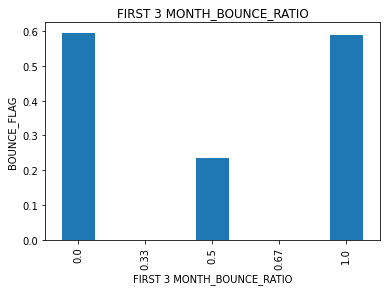

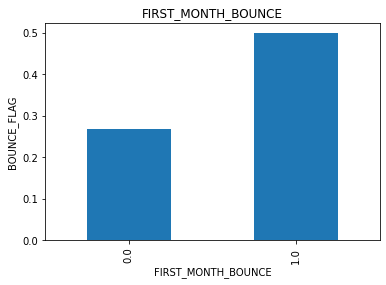

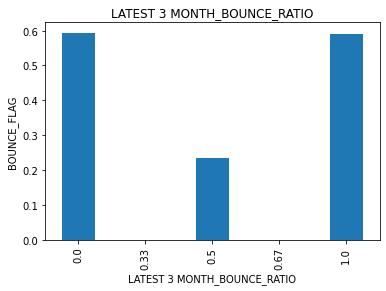

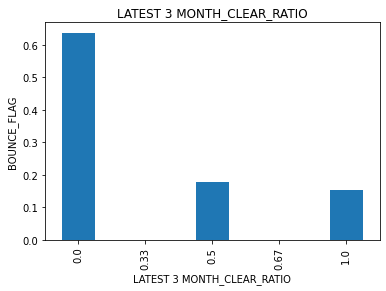

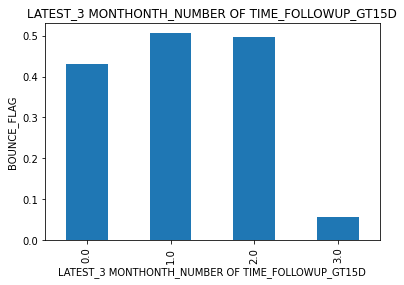

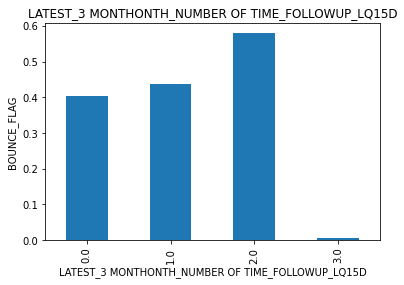

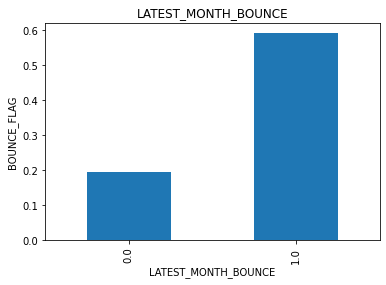

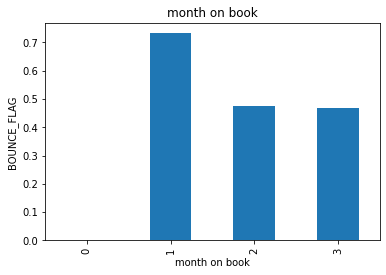

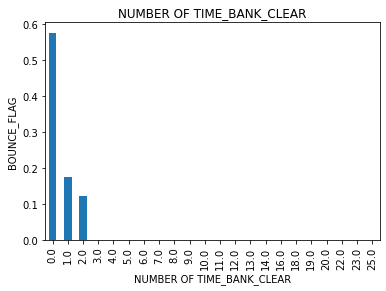

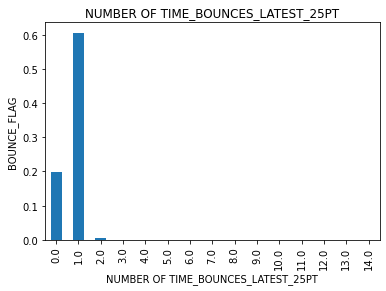

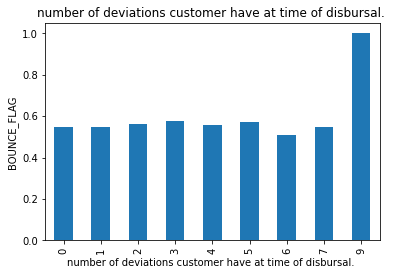

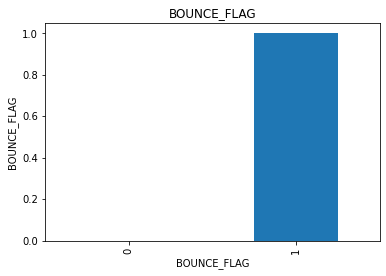

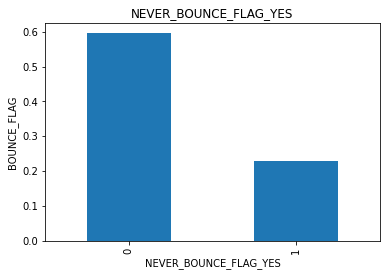

In [24]:
for feature in discrete_feature:
    t=train.copy()
    t.groupby(feature)['BOUNCE_FLAG'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('BOUNCE_FLAG')
    plt.title(feature)
    plt.show()

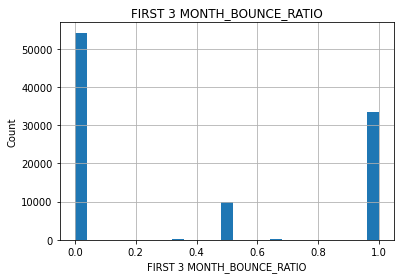

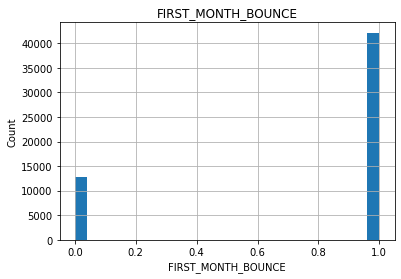

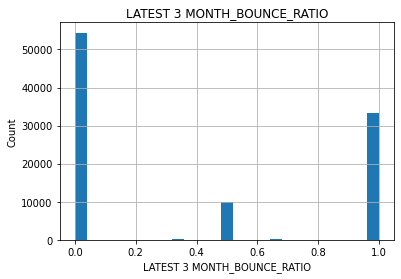

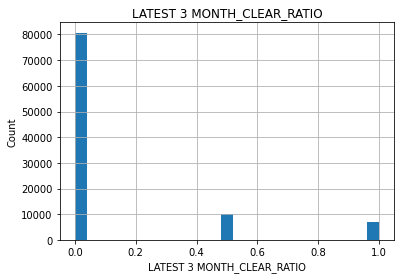

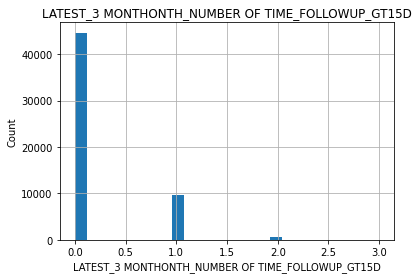

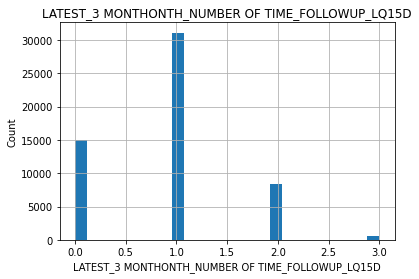

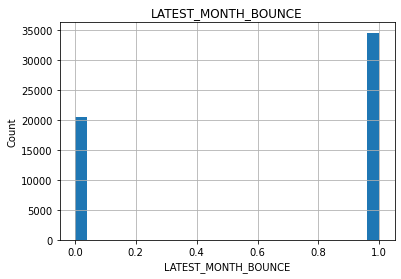

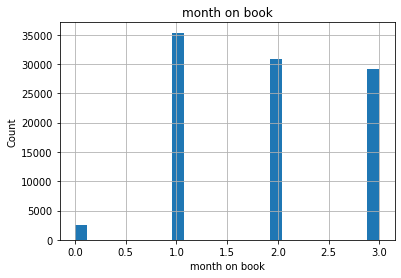

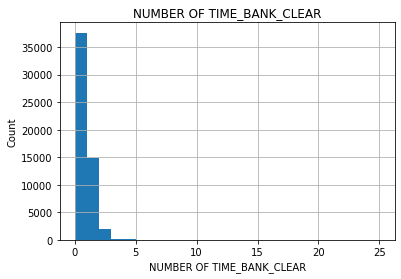

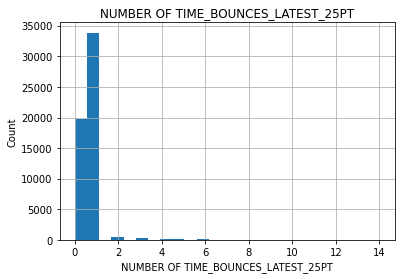

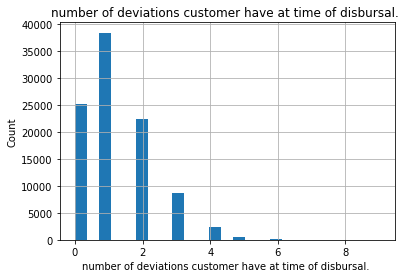

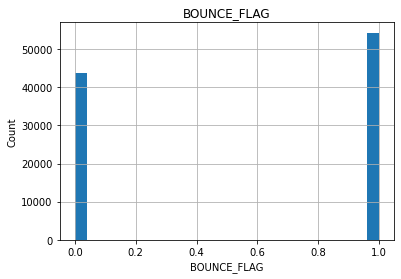

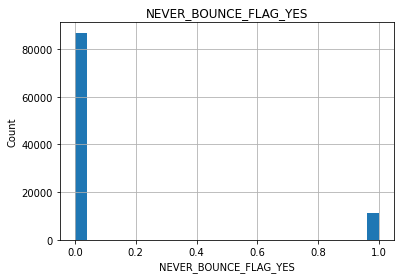

In [25]:
for feature in discrete_feature:
    t=train.copy()
    t[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [26]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 15


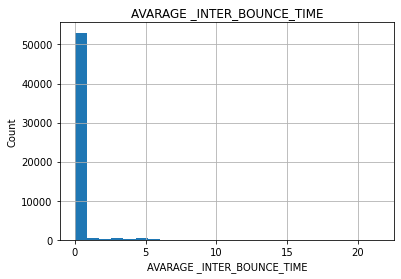

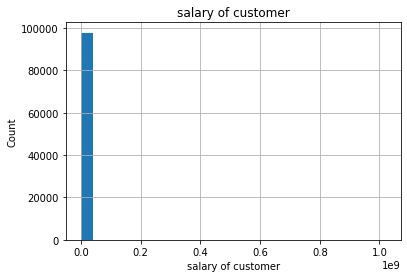

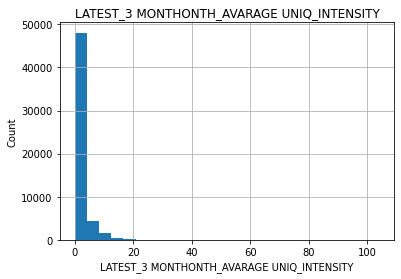

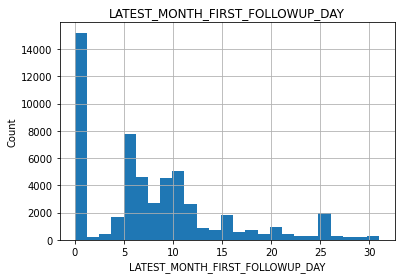

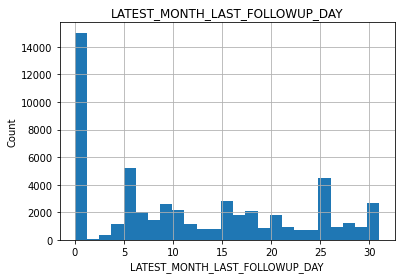

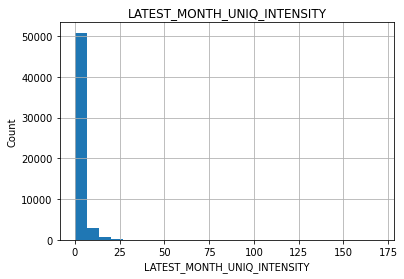

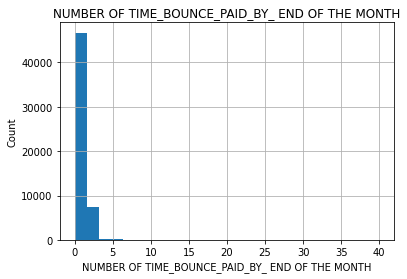

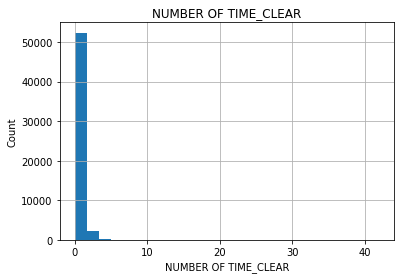

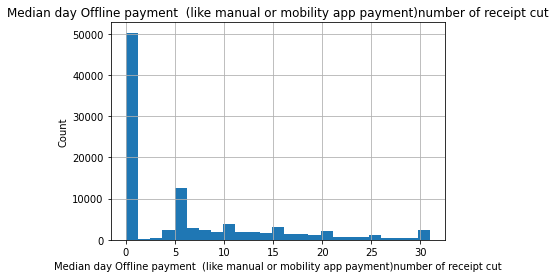

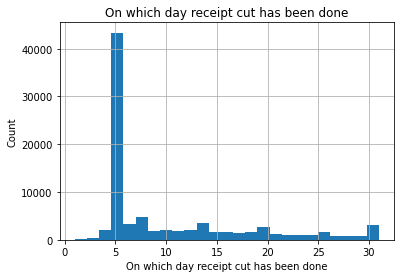

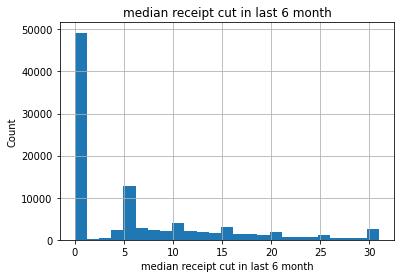

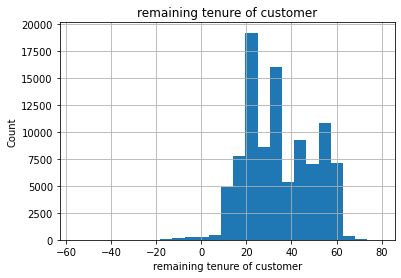

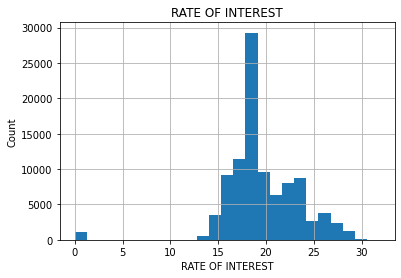

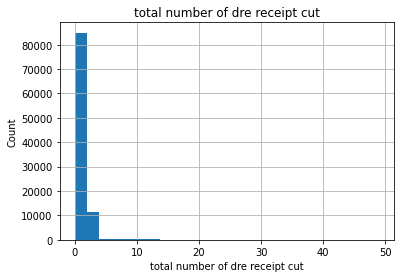

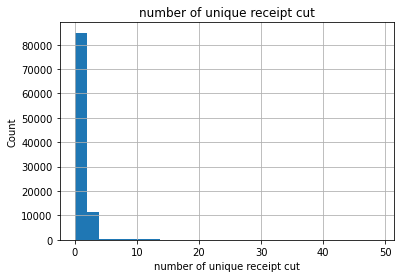

In [27]:
for feature in continuous_feature:
    c=train.copy()
    c[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [28]:
numerical_nan=[feature for feature in train.columns if train[feature].isnull().sum()>1 and train[feature].dtypes!='O']

for feature in numerical_nan:
    print("{}: {}fraction missing value".format(feature,np.around(train[feature].isnull().mean(),4)))

AVARAGE _INTER_BOUNCE_TIME: 0.439fraction missing value
FIRST_MONTH_BOUNCE: 0.439fraction missing value
LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY: 0.439fraction missing value
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D: 0.439fraction missing value
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D: 0.439fraction missing value
LATEST_MONTH_BOUNCE: 0.439fraction missing value
LATEST_MONTH_FIRST_FOLLOWUP_DAY: 0.439fraction missing value
LATEST_MONTH_LAST_FOLLOWUP_DAY: 0.439fraction missing value
LATEST_MONTH_UNIQ_INTENSITY: 0.439fraction missing value
NUMBER OF TIME_BANK_CLEAR: 0.439fraction missing value
NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH: 0.439fraction missing value
NUMBER OF TIME_BOUNCES_LATEST_25PT: 0.439fraction missing value
NUMBER OF TIME_CLEAR: 0.439fraction missing value
On which day receipt cut has been done: 0.1225fraction missing value
remaining tenure of customer: 0.0019fraction missing value


In [29]:
for feature in numerical_nan:
    ## create a new feature to capture nan values
    train[feature+'nan']=np.where(train[feature].isnull(),1,0)
    ## We will replace by using median
    median_value=train[feature].median()
    train[feature].fillna(median_value,inplace=True)
    
train[numerical_nan].isnull().sum()

AVARAGE _INTER_BOUNCE_TIME                          0
FIRST_MONTH_BOUNCE                                  0
LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY           0
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D    0
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D    0
LATEST_MONTH_BOUNCE                                 0
LATEST_MONTH_FIRST_FOLLOWUP_DAY                     0
LATEST_MONTH_LAST_FOLLOWUP_DAY                      0
LATEST_MONTH_UNIQ_INTENSITY                         0
NUMBER OF TIME_BANK_CLEAR                           0
NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH     0
NUMBER OF TIME_BOUNCES_LATEST_25PT                  0
NUMBER OF TIME_CLEAR                                0
On which day receipt cut has been done              0
remaining tenure of customer                        0
dtype: int64

In [30]:
train

,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,BOUNCE_FLAG,NEVER_BOUNCE_FLAG_YES,AVARAGE _INTER_BOUNCE_TIMEnan,FIRST_MONTH_BOUNCEnan,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITYnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15Dnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15Dnan,LATEST_MONTH_BOUNCEnan,LATEST_MONTH_FIRST_FOLLOWUP_DAYnan,LATEST_MONTH_LAST_FOLLOWUP_DAYnan,LATEST_MONTH_UNIQ_INTENSITYnan,NUMBER OF TIME_BANK_CLEARnan,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTHnan,NUMBER OF TIME_BOUNCES_LATEST_25PTnan,NUMBER OF TIME_CLEARnan,On which day receipt cut has been donenan,remaining tenure of customernan
0,0.0,300000,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,7.0,9.0,1.0,1,0.0,1.0,1.0,0.0,0,0,7.0,0,17.0,18.99,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1,0.0,402000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,1,0,5.0,28,16.0,24.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,300000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,0,14,5.0,14,22.0,22.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,330000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,2,5,18.0,5,24.0,22.95,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,698000,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,7.0,9.0,1.0,1,0.0,1.0,1.0,0.0,2,0,18.0,0,45.0,19.01,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97913,0.0,360000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,6.0,6.0,1.0,2,0.0,1.0,1.0,0.0,1,6,5.0,6,44.0,19.00,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97914,0.0,145000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,11.0,11.0,1.0,2,0.0,1.0,1.0,0.0,0,11,5.0,11,10.0,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97915,0.0,260000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,12.0,1.0,2,0.0,0.0,0.0,0.0,1,12,8.0,12,58.0,18.00,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97916,0.0,3111500,0.5,1.0,0.5,0.5,4.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1.0,1.0,0.0,1.0,1,30,31.0,30,24.0,17.89,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
train.isnull().sum()

AVARAGE _INTER_BOUNCE_TIME                                                                0
salary of customer                                                                        0
FIRST 3 MONTH_BOUNCE_RATIO                                                                0
FIRST_MONTH_BOUNCE                                                                        0
LATEST 3 MONTH_BOUNCE_RATIO                                                               0
LATEST 3 MONTH_CLEAR_RATIO                                                                0
LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY                                                 0
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D                                          0
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D                                          0
LATEST_MONTH_BOUNCE                                                                       0
LATEST_MONTH_FIRST_FOLLOWUP_DAY                                                 

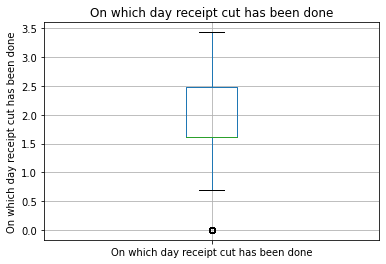

C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


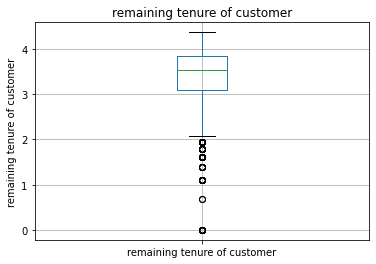

In [32]:
for feature in continuous_feature:
    outliers=train.copy()
    if 0 in outliers[feature].unique():
        pass
    else:
        outliers[feature]=np.log(outliers[feature])
        outliers.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()


In [33]:
train

,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,BOUNCE_FLAG,NEVER_BOUNCE_FLAG_YES,AVARAGE _INTER_BOUNCE_TIMEnan,FIRST_MONTH_BOUNCEnan,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITYnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15Dnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15Dnan,LATEST_MONTH_BOUNCEnan,LATEST_MONTH_FIRST_FOLLOWUP_DAYnan,LATEST_MONTH_LAST_FOLLOWUP_DAYnan,LATEST_MONTH_UNIQ_INTENSITYnan,NUMBER OF TIME_BANK_CLEARnan,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTHnan,NUMBER OF TIME_BOUNCES_LATEST_25PTnan,NUMBER OF TIME_CLEARnan,On which day receipt cut has been donenan,remaining tenure of customernan
0,0.0,300000,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,7.0,9.0,1.0,1,0.0,1.0,1.0,0.0,0,0,7.0,0,17.0,18.99,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1,0.0,402000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,1,0,5.0,28,16.0,24.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,300000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,1.0,1.0,0.0,0,14,5.0,14,22.0,22.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,330000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,2,5,18.0,5,24.0,22.95,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,698000,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,7.0,9.0,1.0,1,0.0,1.0,1.0,0.0,2,0,18.0,0,45.0,19.01,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97913,0.0,360000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,6.0,6.0,1.0,2,0.0,1.0,1.0,0.0,1,6,5.0,6,44.0,19.00,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97914,0.0,145000,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,11.0,11.0,1.0,2,0.0,1.0,1.0,0.0,0,11,5.0,11,10.0,0.00,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97915,0.0,260000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,12.0,12.0,1.0,2,0.0,0.0,0.0,0.0,1,12,8.0,12,58.0,18.00,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97916,0.0,3111500,0.5,1.0,0.5,0.5,4.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1.0,1.0,0.0,1.0,1,30,31.0,30,24.0,17.89,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
train.isnull().sum()

AVARAGE _INTER_BOUNCE_TIME                                                                0
salary of customer                                                                        0
FIRST 3 MONTH_BOUNCE_RATIO                                                                0
FIRST_MONTH_BOUNCE                                                                        0
LATEST 3 MONTH_BOUNCE_RATIO                                                               0
LATEST 3 MONTH_CLEAR_RATIO                                                                0
LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY                                                 0
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D                                          0
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D                                          0
LATEST_MONTH_BOUNCE                                                                       0
LATEST_MONTH_FIRST_FOLLOWUP_DAY                                                 

### Feature Scaling

In [35]:
feature_scale=[feature for feature in train.columns if feature not in ['BOUNCE_FLAG']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train[feature_scale])

MinMaxScaler()

In [36]:
scaler.transform(train[feature_scale])

array([[0.00000000e+00, 2.94117647e-04, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.94117647e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.94117647e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.54901961e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.05049020e-03, 5.00000000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.32558140e-02, 6.51960784e-04, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [37]:
# transform the train and test set, and add on the Id and SalePrice variables
final = pd.concat([train[['BOUNCE_FLAG',]].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train[feature_scale]), columns=feature_scale)],
                    axis=1)
final

,BOUNCE_FLAG,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,NEVER_BOUNCE_FLAG_YES,AVARAGE _INTER_BOUNCE_TIMEnan,FIRST_MONTH_BOUNCEnan,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITYnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15Dnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15Dnan,LATEST_MONTH_BOUNCEnan,LATEST_MONTH_FIRST_FOLLOWUP_DAYnan,LATEST_MONTH_LAST_FOLLOWUP_DAYnan,LATEST_MONTH_UNIQ_INTENSITYnan,NUMBER OF TIME_BANK_CLEARnan,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTHnan,NUMBER OF TIME_BOUNCES_LATEST_25PTnan,NUMBER OF TIME_CLEARnan,On which day receipt cut has been donenan,remaining tenure of customernan
0,1,0.000000,0.000294,0.0,1.0,0.0,0.0,0.019231,0.0,0.333333,1.0,0.225806,0.290323,0.005882,0.333333,0.00,0.025,0.071429,0.00000,0.000000,0.000000,0.200000,0.000000,0.540741,0.596045,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0,0.000000,0.000394,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.666667,0.00,0.025,0.071429,0.00000,0.111111,0.000000,0.133333,0.903226,0.533333,0.753296,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.000000,0.000294,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.666667,0.00,0.025,0.071429,0.00000,0.000000,0.451613,0.133333,0.451613,0.577778,0.690521,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.000000,0.000324,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,0.00,0.000,0.000000,0.00000,0.222222,0.161290,0.566667,0.161290,0.592593,0.720339,0.020408,0.020408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.000000,0.000684,0.0,1.0,0.0,0.0,0.019231,0.0,0.333333,1.0,0.225806,0.290323,0.005882,0.333333,0.00,0.025,0.071429,0.00000,0.222222,0.000000,0.566667,0.000000,0.748148,0.596673,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97913,1,0.000000,0.000353,1.0,1.0,1.0,0.0,0.009615,0.0,0.333333,1.0,0.193548,0.193548,0.005882,0.666667,0.00,0.025,0.071429,0.00000,0.111111,0.193548,0.133333,0.193548,0.740741,0.596359,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97914,0,0.000000,0.000142,1.0,1.0,1.0,0.0,0.009615,0.0,0.333333,1.0,0.354839,0.354839,0.005882,0.666667,0.00,0.025,0.071429,0.00000,0.000000,0.354839,0.133333,0.354839,0.488889,0.000000,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97915,1,0.000000,0.000255,0.0,0.0,0.0,0.0,0.009615,0.0,0.333333,0.0,0.387097,0.387097,0.005882,0.666667,0.00,0.000,0.000000,0.00000,0.111111,0.387097,0.233333,0.387097,0.844444,0.564972,0.020408,0.020408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97916,1,0.000000,0.003050,0.5,1.0,0.5,0.5,0.038462,0.0,0.333333,0.0,0.000000,0.000000,0.000000,1.000000,0.04,0.025,0.000000,0.02381,0.111111,0.967742,1.000000,0.967742,0.592593,0.561519,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [38]:
cust_id = pd.DataFrame(cust_id)
cust_id

,cust_id
0,cust_1
1,cust_2
2,cust_3
3,cust_4
4,cust_5
...,...
97913,cust_97914
97914,cust_97915
97915,cust_97916
97916,cust_97917


In [39]:
processed_train = pd.concat([cust_id,final], axis= 1)
processed_train

,cust_id,BOUNCE_FLAG,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,NEVER_BOUNCE_FLAG_YES,AVARAGE _INTER_BOUNCE_TIMEnan,FIRST_MONTH_BOUNCEnan,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITYnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15Dnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15Dnan,LATEST_MONTH_BOUNCEnan,LATEST_MONTH_FIRST_FOLLOWUP_DAYnan,LATEST_MONTH_LAST_FOLLOWUP_DAYnan,LATEST_MONTH_UNIQ_INTENSITYnan,NUMBER OF TIME_BANK_CLEARnan,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTHnan,NUMBER OF TIME_BOUNCES_LATEST_25PTnan,NUMBER OF TIME_CLEARnan,On which day receipt cut has been donenan,remaining tenure of customernan
0,cust_1,1,0.000000,0.000294,0.0,1.0,0.0,0.0,0.019231,0.0,0.333333,1.0,0.225806,0.290323,0.005882,0.333333,0.00,0.025,0.071429,0.00000,0.000000,0.000000,0.200000,0.000000,0.540741,0.596045,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,cust_2,0,0.000000,0.000394,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.666667,0.00,0.025,0.071429,0.00000,0.111111,0.000000,0.133333,0.903226,0.533333,0.753296,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,cust_3,0,0.000000,0.000294,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.666667,0.00,0.025,0.071429,0.00000,0.000000,0.451613,0.133333,0.451613,0.577778,0.690521,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,cust_4,1,0.000000,0.000324,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,0.00,0.000,0.000000,0.00000,0.222222,0.161290,0.566667,0.161290,0.592593,0.720339,0.020408,0.020408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cust_5,1,0.000000,0.000684,0.0,1.0,0.0,0.0,0.019231,0.0,0.333333,1.0,0.225806,0.290323,0.005882,0.333333,0.00,0.025,0.071429,0.00000,0.222222,0.000000,0.566667,0.000000,0.748148,0.596673,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97913,cust_97914,1,0.000000,0.000353,1.0,1.0,1.0,0.0,0.009615,0.0,0.333333,1.0,0.193548,0.193548,0.005882,0.666667,0.00,0.025,0.071429,0.00000,0.111111,0.193548,0.133333,0.193548,0.740741,0.596359,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97914,cust_97915,0,0.000000,0.000142,1.0,1.0,1.0,0.0,0.009615,0.0,0.333333,1.0,0.354839,0.354839,0.005882,0.666667,0.00,0.025,0.071429,0.00000,0.000000,0.354839,0.133333,0.354839,0.488889,0.000000,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97915,cust_97916,1,0.000000,0.000255,0.0,0.0,0.0,0.0,0.009615,0.0,0.333333,0.0,0.387097,0.387097,0.005882,0.666667,0.00,0.000,0.000000,0.00000,0.111111,0.387097,0.233333,0.387097,0.844444,0.564972,0.020408,0.020408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97916,cust_97917,1,0.000000,0.003050,0.5,1.0,0.5,0.5,0.038462,0.0,0.333333,0.0,0.000000,0.000000,0.000000,1.000000,0.04,0.025,0.000000,0.02381,0.111111,0.967742,1.000000,0.967742,

In [40]:
processed_train.to_csv('processed_train.csv',index=False)

In [41]:
processed_train.head()

,cust_id,BOUNCE_FLAG,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,NEVER_BOUNCE_FLAG_YES,AVARAGE _INTER_BOUNCE_TIMEnan,FIRST_MONTH_BOUNCEnan,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITYnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15Dnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15Dnan,LATEST_MONTH_BOUNCEnan,LATEST_MONTH_FIRST_FOLLOWUP_DAYnan,LATEST_MONTH_LAST_FOLLOWUP_DAYnan,LATEST_MONTH_UNIQ_INTENSITYnan,NUMBER OF TIME_BANK_CLEARnan,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTHnan,NUMBER OF TIME_BOUNCES_LATEST_25PTnan,NUMBER OF TIME_CLEARnan,On which day receipt cut has been donenan,remaining tenure of customernan
0,cust_1,1,0.0,0.000294,0.0,1.0,0.0,0.0,0.019231,0.0,0.333333,1.0,0.225806,0.290323,0.005882,0.333333,0.0,0.025,0.071429,0.0,0.000000,0.000000,0.200000,0.000000,0.540741,0.596045,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,cust_2,0,0.0,0.000394,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.666667,0.0,0.025,0.071429,0.0,0.111111,0.000000,0.133333,0.903226,0.533333,0.753296,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,cust_3,0,0.0,0.000294,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.666667,0.0,0.025,0.071429,0.0,0.000000,0.451613,0.133333,0.451613,0.577778,0.690521,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,cust_4,1,0.0,0.000324,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,0.0,0.000,0.000000,0.0,0.222222,0.161290,0.566667,0.161290,0.592593,0.720339,0.020408,0.020408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cust_5,1,0.0,0.000684,0.0,1.0,0.0,0.0,0.019231,0.0,0.333333,1.0,0.225806,0.290323,0.005882,0.333333,0.0,0.025,0.071429,0.0,0.222222,0.000000,0.566667,0.000000,0.748148,0.596673,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [42]:
processed_train.corr()

,BOUNCE_FLAG,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,NEVER_BOUNCE_FLAG_YES,AVARAGE _INTER_BOUNCE_TIMEnan,FIRST_MONTH_BOUNCEnan,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITYnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15Dnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15Dnan,LATEST_MONTH_BOUNCEnan,LATEST_MONTH_FIRST_FOLLOWUP_DAYnan,LATEST_MONTH_LAST_FOLLOWUP_DAYnan,LATEST_MONTH_UNIQ_INTENSITYnan,NUMBER OF TIME_BANK_CLEARnan,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTHnan,NUMBER OF TIME_BOUNCES_LATEST_25PTnan,NUMBER OF TIME_CLEARnan,On which day receipt cut has been donenan,remaining tenure of customernan
BOUNCE_FLAG,1.000000,-0.093872,0.001145,-0.025275,0.223113,-0.023360,-0.340677,-0.007963,-0.033631,0.076817,0.369656,0.119108,0.119870,-0.007926,-0.140074,-0.270039,0.021167,0.143195,-0.225418,0.014067,-0.059961,0.394152,-0.052895,0.141079,0.002837,-0.120059,-0.120059,-0.234708,0.246766,0.246766,0.246766,0.246766,0.246766,0.246766,0.246766,0.246766,0.246766,0.246766,0.246766,0.246766,0.246766,0.208611,-0.004308
AVARAGE _INTER_BOUNCE_TIME,-0.093872,1.000000,0.012780,0.205343,0.020138,0.200819,-0.032773,0.302116,0.169699,0.274654,0.012380,0.077991,0.155125,0.286077,-0.172256,0.133757,0.338135,0.317451,0.188195,-0.055743,0.232957,0.068034,0.192738,-0.153674,-0.044180,0.537334,0.537334,-0.067951,-0.167988,-0.167988,-0.167988,-0.167988,-0.167988,-0.167988,-0.167988,-0.167988,-0.167988,-0.167988,-0.167988,-0.167988,-0.167988,0.150710,-0.007412
salary of customer,0.001145,0.012780,1.000000,0.008511,-0.000070,0.008778,-0.001527,0.000643,0.017829,-0.012798,0.000731,0.010340,0.004145,0.002287,-0.000696,0.000307,0.007341,0.005862,0.002624,-0.002789,0.004829,0.001514,0.003338,-0.002583,-0.005108,0.011166,0.011166,-0.001505,-0.007248,-0.007248,-0.007248,-0.007248,-0.007248,-0.007248,-0.007248,-0.007248,-0.007248,-0.007248,-0.007248,-0.007248,-0.007248,-0.001973,-0.000398
FIRST 3 MONTH_BOUNCE_RATIO,-0.025275,0.205343,0.008511,1.000000,0.278303,0.992745,-0.187813,0.146948,0.251584,0.034348,0.170327,0.208756,0.310628,0.220988,0.436636,-0.092933,0.206981,0.174973,-0.075865,-0.024129,0.644119,0.071398,0.654288,0.024974,-0.103975,0.333298,0.333298,-0.305646,-0.755611,-0.755611,-0.755611,-0.755611,-0.755611,-0.755611,-0.755611,-0.755611,-0.755611,-0.755611,-0.755611,-0.755611,-0.755611,0.078474,-0.006443
FIRST_MONTH_BOUNCE,0.223113,0.020138,-0.000070,0.278303,1.000000,0.269338,-0.650264,0.065746,-0.064348,0.198206,0.640469,0.096674,0.095482,0.016966,-0.212482,-0.376376,0.270305,0.378274,-0.320354,0.007905,-0.032022,0.064799,-0.033794,0.034933,0.042923,-0.042516,-0.042516,-0.921930,0.343296,0.343296,0.343296,0.343296,0.343296,0.343296,0.343296,0.343296,0.343296,0.343296,0.343296,0.343296,0.343296,0.012868,-0.010408
LATEST 3 MONTH_BOUNCE_RATIO,-0.023360,0.200819,0.008778,0.992745,0.269338,1.000000,-0.191962,0.150103,0.250716,0.036461,0.179152,0.209430,0.312495,0.218010,0.440143,-0.098628,0.209407,0.169776,-0.062146,-0.021754,0.640564,0.073320,0.657382,0.032810,-0.103540,0.330735,0.330735,-0.304893,-0.753752,-0.753752,-0.753752,-0.753752,-0.753752,-0.753752,-0.753752,-0.753752,-0.753752,-0.753752,-0.753752,-0.753752,-0.753752,0.073033,-

In [43]:
y_train=processed_train[['BOUNCE_FLAG']]
X_train=processed_train.drop(['cust_id','BOUNCE_FLAG'],axis=1)

In [44]:
X_train

,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,NEVER_BOUNCE_FLAG_YES,AVARAGE _INTER_BOUNCE_TIMEnan,FIRST_MONTH_BOUNCEnan,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITYnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15Dnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15Dnan,LATEST_MONTH_BOUNCEnan,LATEST_MONTH_FIRST_FOLLOWUP_DAYnan,LATEST_MONTH_LAST_FOLLOWUP_DAYnan,LATEST_MONTH_UNIQ_INTENSITYnan,NUMBER OF TIME_BANK_CLEARnan,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTHnan,NUMBER OF TIME_BOUNCES_LATEST_25PTnan,NUMBER OF TIME_CLEARnan,On which day receipt cut has been donenan,remaining tenure of customernan
0,0.000000,0.000294,0.0,1.0,0.0,0.0,0.019231,0.0,0.333333,1.0,0.225806,0.290323,0.005882,0.333333,0.00,0.025,0.071429,0.00000,0.000000,0.000000,0.200000,0.000000,0.540741,0.596045,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.000000,0.000394,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.666667,0.00,0.025,0.071429,0.00000,0.111111,0.000000,0.133333,0.903226,0.533333,0.753296,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000294,1.0,1.0,1.0,0.0,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.666667,0.00,0.025,0.071429,0.00000,0.000000,0.451613,0.133333,0.451613,0.577778,0.690521,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000324,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,0.00,0.000,0.000000,0.00000,0.222222,0.161290,0.566667,0.161290,0.592593,0.720339,0.020408,0.020408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000684,0.0,1.0,0.0,0.0,0.019231,0.0,0.333333,1.0,0.225806,0.290323,0.005882,0.333333,0.00,0.025,0.071429,0.00000,0.222222,0.000000,0.566667,0.000000,0.748148,0.596673,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97913,0.000000,0.000353,1.0,1.0,1.0,0.0,0.009615,0.0,0.333333,1.0,0.193548,0.193548,0.005882,0.666667,0.00,0.025,0.071429,0.00000,0.111111,0.193548,0.133333,0.193548,0.740741,0.596359,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97914,0.000000,0.000142,1.0,1.0,1.0,0.0,0.009615,0.0,0.333333,1.0,0.354839,0.354839,0.005882,0.666667,0.00,0.025,0.071429,0.00000,0.000000,0.354839,0.133333,0.354839,0.488889,0.000000,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97915,0.000000,0.000255,0.0,0.0,0.0,0.0,0.009615,0.0,0.333333,0.0,0.387097,0.387097,0.005882,0.666667,0.00,0.000,0.000000,0.00000,0.111111,0.387097,0.233333,0.387097,0.844444,0.564972,0.020408,0.020408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97916,0.000000,0.003050,0.5,1.0,0.5,0.5,0.038462,0.0,0.333333,0.0,0.000000,0.000000,0.000000,1.000000,0.04,0.025,0.000000,0.02381,0.111111,0.967742,1.000000,0.967742,0.592593,0.561519,0.020408,0.020408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
X_train.isnull().sum()

AVARAGE _INTER_BOUNCE_TIME                                                                0
salary of customer                                                                        0
FIRST 3 MONTH_BOUNCE_RATIO                                                                0
FIRST_MONTH_BOUNCE                                                                        0
LATEST 3 MONTH_BOUNCE_RATIO                                                               0
LATEST 3 MONTH_CLEAR_RATIO                                                                0
LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY                                                 0
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D                                          0
LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D                                          0
LATEST_MONTH_BOUNCE                                                                       0
LATEST_MONTH_FIRST_FOLLOWUP_DAY                                                 

In [46]:
y_train

,BOUNCE_FLAG
0,1
1,0
2,0
3,1
4,1
...,...
97913,1
97914,0
97915,1
97916,1


### Feature Selection

In [47]:
### Lasso Feature Selection

In [48]:
### from sklearn.linear_model import Lasso
### from sklearn.feature_selection import SelectFromModel

In [49]:
### lasso_sel_model = SelectFromModel(Lasso(alpha=0.0001, random_state=0)) # remember to set the seed, the random state in this function
### lasso_sel_model.fit(X_train, y_train)

In [50]:
### lasso_sel_model.get_support()

In [51]:
### lasso_feat = X_train.columns[(lasso_sel_model.get_support())]

In [52]:
### print('total features: {}'.format((X_train.shape[1])))
### print('selected features: {}'.format(len(lasso_feat)))

In [53]:
### lasso_feat

In [54]:
### SVC Feature Selection

In [55]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [56]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, random_state=0).fit(X_train, y_train)
lsvc_sel_model = SelectFromModel(lsvc, prefit=True)

C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [57]:
lsvc_sel_model.get_support()

array([ True, False, False,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
        True, False, False, False,  True, False])

In [58]:
lsvc_feat = X_train.columns[(lsvc_sel_model.get_support())]

In [59]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(lsvc_feat)))

total features: 42
selected features: 21


In [60]:
lsvc_feat

Index(['AVARAGE _INTER_BOUNCE_TIME', 'FIRST_MONTH_BOUNCE',
       'LATEST 3 MONTH_CLEAR_RATIO',
       'LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D',
       'LATEST_MONTH_BOUNCE', 'LATEST_MONTH_FIRST_FOLLOWUP_DAY',
       'LATEST_MONTH_LAST_FOLLOWUP_DAY', 'month on book',
       'NUMBER OF TIME_BOUNCES_LATEST_25PT',
       'number of deviations customer have at time of disbursal. ',
       'Median day Offline payment  (like manual or mobility app payment)number of receipt cut',
       'On which day receipt cut has been done',
       'remaining tenure of customer', 'RATE OF INTEREST',
       'total number of dre receipt cut',
       'LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15Dnan',
       'LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15Dnan',
       'LATEST_MONTH_LAST_FOLLOWUP_DAYnan', 'LATEST_MONTH_UNIQ_INTENSITYnan',
       'NUMBER OF TIME_BANK_CLEARnan',
       'On which day receipt cut has been donenan'],
      dtype='object')

In [61]:
X_train_lsvc=X_train[lsvc_feat]
y_train_lsvc=y_train

In [62]:
### LR Feature Selection

In [63]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import SelectFromModel

In [64]:
#lr = LogisticRegression(C=0.01, penalty="l1", solver='liblinear', random_state=None).fit(X_train, y_train)
#lr_sel_model = SelectFromModel(lr, prefit=True)

In [65]:
#lr_sel_model.get_support()

In [66]:
#lr_feat = X_train.columns[(lr_sel_model.get_support())]

In [67]:
#print('total features: {}'.format((X_train.shape[1])))
#print('selected features: {}'.format(len(lr_feat)))

In [68]:
#X_train_lr=X_train[lr_feat]
#y_train_lr=y_train

### Model Testing

In [69]:
## SVM Model

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_lsvc, y_train_lsvc, test_size=0.3, random_state=42)

In [71]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [72]:
y_pred=svm_clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8413330610021786

In [74]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8394482700788554

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81     13143
           1       0.82      0.92      0.86     16233

    accuracy                           0.84     29376
   macro avg       0.85      0.83      0.84     29376
weighted avg       0.85      0.84      0.84     29376



In [76]:
## Logistic Regression

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lsvc, y_train_lsvc, test_size=0.3, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
y_pred=lr_clf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8026279956427015

In [81]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8028336772027619

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     13143
           1       0.83      0.81      0.82     16233

    accuracy                           0.80     29376
   macro avg       0.80      0.80      0.80     29376
weighted avg       0.80      0.80      0.80     29376



In [83]:
### Naive Bayes

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lsvc, y_train_lsvc, test_size=0.3, random_state=0)

In [85]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
y_pred = nb_clf.fit(X_train, y_train).predict(X_test)

C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6743600217864923

In [87]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.6579316849409423

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.45      0.55     13080
           1       0.66      0.86      0.75     16296

    accuracy                           0.67     29376
   macro avg       0.69      0.65      0.65     29376
weighted avg       0.68      0.67      0.66     29376



In [89]:
### Random Forest

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lsvc, y_train_lsvc, test_size=0.3, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rf_clf.fit(X_train, y_train)

C:\Users\MinhazPC\AppData\Local\Temp\ipykernel_13416\1050653875.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

In [92]:
y_pred=rf_clf.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8842252178649237

In [94]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.88347882533012

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86     13143
           1       0.87      0.93      0.90     16233

    accuracy                           0.88     29376
   macro avg       0.89      0.88      0.88     29376
weighted avg       0.89      0.88      0.88     29376



In [96]:
### kNN

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lsvc, y_train_lsvc, test_size=0.3, random_state=42)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors= 200)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8327886710239651

In [100]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.8326415845428672

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81     13143
           1       0.84      0.86      0.85     16233

    accuracy                           0.83     29376
   macro avg       0.83      0.83      0.83     29376
weighted avg       0.83      0.83      0.83     29376



In [102]:
## Gradient Boost

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lsvc, y_train_lsvc, test_size=0.3, random_state=42)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0).fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8853145424836601

In [106]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.884758152006925

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87     13143
           1       0.87      0.93      0.90     16233

    accuracy                           0.89     29376
   macro avg       0.89      0.88      0.88     29376
weighted avg       0.89      0.89      0.88     29376



### selected model = gradient boost

### final prediction

In [108]:
processed_test=pd.read_csv('processed_test.csv')

In [109]:
processed_test.head()

,cust_id,AVARAGE _INTER_BOUNCE_TIME,salary of customer,FIRST 3 MONTH_BOUNCE_RATIO,FIRST_MONTH_BOUNCE,LATEST 3 MONTH_BOUNCE_RATIO,LATEST 3 MONTH_CLEAR_RATIO,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITY,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15D,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15D,LATEST_MONTH_BOUNCE,LATEST_MONTH_FIRST_FOLLOWUP_DAY,LATEST_MONTH_LAST_FOLLOWUP_DAY,LATEST_MONTH_UNIQ_INTENSITY,month on book,NUMBER OF TIME_BANK_CLEAR,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTH,NUMBER OF TIME_BOUNCES_LATEST_25PT,NUMBER OF TIME_CLEAR,number of deviations customer have at time of disbursal.,Median day Offline payment (like manual or mobility app payment)number of receipt cut,On which day receipt cut has been done,median receipt cut in last 6 month,remaining tenure of customer,RATE OF INTEREST,total number of dre receipt cut,number of unique receipt cut,NEVER_BOUNCE_FLAG_YES,AVARAGE _INTER_BOUNCE_TIMEnan,FIRST_MONTH_BOUNCEnan,LATEST_3 MONTHONTH_AVARAGE UNIQ_INTENSITYnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_GT15Dnan,LATEST_3 MONTHONTH_NUMBER OF TIME_FOLLOWUP_LQ15Dnan,LATEST_MONTH_BOUNCEnan,LATEST_MONTH_FIRST_FOLLOWUP_DAYnan,LATEST_MONTH_LAST_FOLLOWUP_DAYnan,LATEST_MONTH_UNIQ_INTENSITYnan,NUMBER OF TIME_BANK_CLEARnan,NUMBER OF TIME_BOUNCE_PAID_BY_ END OF THE MONTHnan,NUMBER OF TIME_BOUNCES_LATEST_25PTnan,NUMBER OF TIME_CLEARnan,On which day receipt cut has been donenan
0,cust1,0.0,0.000294,0.0,1.0,0.0,0.0,0.041667,0.0,0.0,1.0,0.166667,0.16129,0.041667,0.333333,0.0,0.083333,0.142857,0.0,0.0,0.000000,0.200000,0.000000,0.345238,0.599432,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,cust2,0.0,0.000394,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.00000,0.000000,0.666667,0.0,0.083333,0.142857,0.0,0.2,0.000000,0.133333,0.903226,0.333333,0.757576,0.022727,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,cust3,0.0,0.000294,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.00000,0.000000,0.666667,0.0,0.083333,0.142857,0.0,0.0,0.451613,0.133333,0.451613,0.404762,0.694444,0.022727,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,cust4,0.0,0.000324,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.666667,0.0,0.000000,0.000000,0.0,0.4,0.161290,0.566667,0.161290,0.428571,0.724432,0.022727,0.022727,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cust5,0.0,0.000684,0.0,1.0,0.0,0.0,0.041667,0.0,0.0,1.0,0.166667,0.16129,0.041667,0.333333,0.0,0.083333,0.142857,0.0,0.4,0.000000,0.566667,0.000000,0.678571,0.600063,0.000000,0.000000,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [110]:
customer_id = processed_test['cust_id']

In [111]:
customer_id

0          cust1
1          cust2
2          cust3
3          cust4
4          cust5
          ...   
8118    cust8119
8119    cust8120
8120    cust8121
8121    cust8122
8122    cust8123
Name: cust_id, Length: 8123, dtype: object

In [112]:
X = X_train_lsvc
y = y_train_lsvc

In [113]:
X_new = processed_test[lsvc_feat]

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=0).fit(X, y)
y_new = gb_clf.predict(X_new)
y_new_predvalues = gb_clf.predict_proba(X_new)

C:\Users\MinhazPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
from sklearn.inspection import permutation_importance
# perform permutation importance
imp = permutation_importance(gb_clf, X, y, scoring='accuracy')

importance = imp.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00173
Feature: 1, Score: 0.00032
Feature: 2, Score: 0.00117
Feature: 3, Score: 0.00013
Feature: 4, Score: 0.00368
Feature: 5, Score: 0.00056
Feature: 6, Score: 0.00038
Feature: 7, Score: 0.05139
Feature: 8, Score: 0.00086
Feature: 9, Score: 0.00028
Feature: 10, Score: 0.00542
Feature: 11, Score: 0.27324
Feature: 12, Score: 0.00182
Feature: 13, Score: 0.01629
Feature: 14, Score: 0.00391
Feature: 15, Score: -0.00001
Feature: 16, Score: -0.00018
Feature: 17, Score: -0.00004
Feature: 18, Score: -0.00003
Feature: 19, Score: -0.00001
Feature: 20, Score: 0.10931


In [116]:
y_new

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [117]:
y_new_predvalues

array([[0.09827628, 0.90172372],
       [0.84647209, 0.15352791],
       [0.88610942, 0.11389058],
       ...,
       [0.07730001, 0.92269999],
       [0.09488717, 0.90511283],
       [0.75507841, 0.24492159]])

In [118]:
y_new_prob = y_new_predvalues[:,1]
y_new_prob

array([0.90172372, 0.15352791, 0.11389058, ..., 0.92269999, 0.90511283,
       0.24492159])

In [119]:
out = pd.DataFrame({'customer_id': customer_id, 'BOUNCE_FLAG': y_new, 'prob_score': y_new_prob})

In [120]:
out

,customer_id,BOUNCE_FLAG,prob_score
0,cust1,1,0.901724
1,cust2,0,0.153528
2,cust3,0,0.113891
3,cust4,1,0.722114
4,cust5,1,0.875769
...,...,...,...
8118,cust8119,1,0.951558
8119,cust8120,1,0.971332
8120,cust8121,1,0.922700
8121,cust8122,1,0.905113


In [121]:
out.to_csv('result.csv',index=False)